In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

In [2]:
dec_State  =   pd.read_csv('../Dataset/Decadal_Air_data_states.csv')
dec_City   =   pd.read_csv('../Dataset/Decadal_air_data_cities.csv')
indus_State      =   pd.read_csv('../Dataset/Industries_2011_2020.csv')
motor_veh_State  =   pd.read_csv('../Dataset/MotorVehicles_2011_2020.csv')

In [3]:
#CHANGING COLUMN NAMES
indus_State.rename(columns={'Number':'Number_of_Industries'},inplace=True)
motor_veh_State.rename(columns={'Number':'Number_of_Vehicles'},inplace=True)

**Heatmap of Different Pollutants**

In [4]:
def Heatmap(pollutant,area):
    sns.set_theme(style="whitegrid")
    fig,b=plt.subplots(1,1,figsize=(16,16))
    name='dec_'+area
    if pollutant == 'Number_of_Industries':   #for industries
        name = 'indus_'+area
    elif pollutant == 'Number_of_Vehicles':   #for motorvehicles
        name = 'motor_veh_'+area
    fight=globals()[name].pivot(area, "year", pollutant)
    ct_so2 = sns.heatmap(fight,annot=True,cmap="Oranges",linewidths=0.5,fmt='.1f').set_title(pollutant+' HeatMap for '+area)
    fig.savefig('../Images/'+pollutant+'-heatmap-'+area+'.png')
    plt.tight_layout()

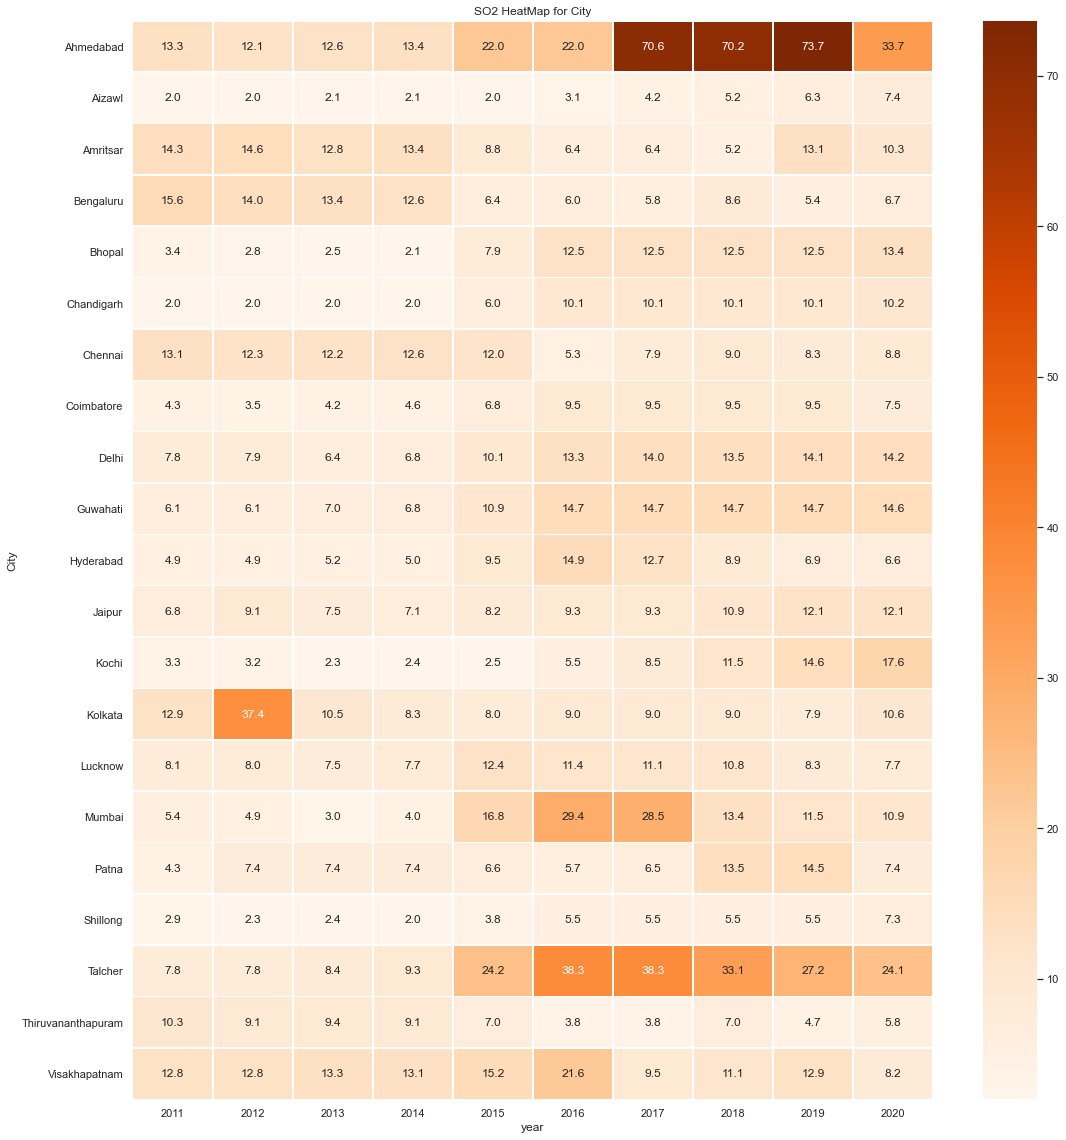

In [5]:
Heatmap('SO2','City')

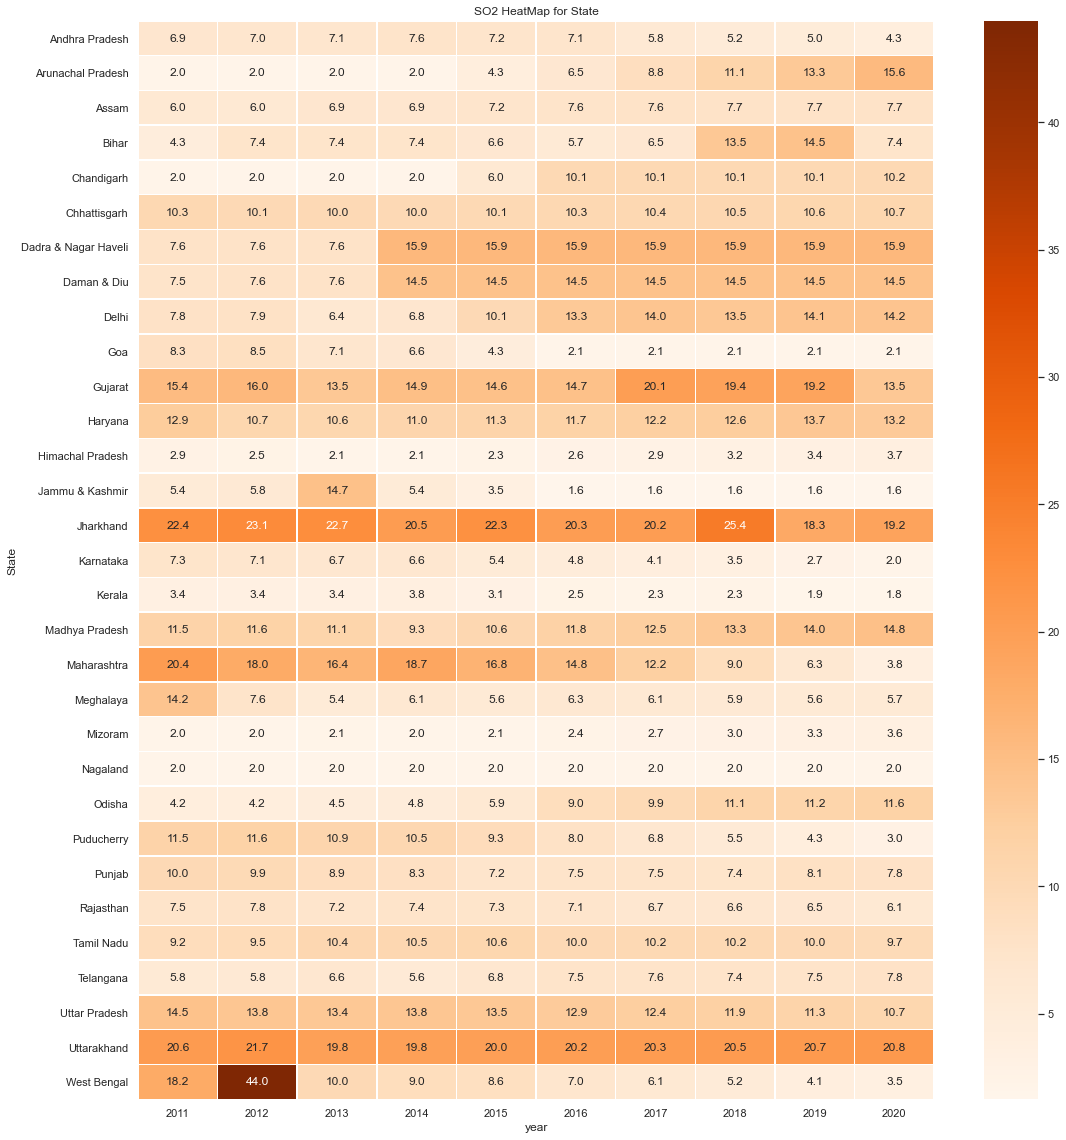

In [6]:
Heatmap('SO2','State')

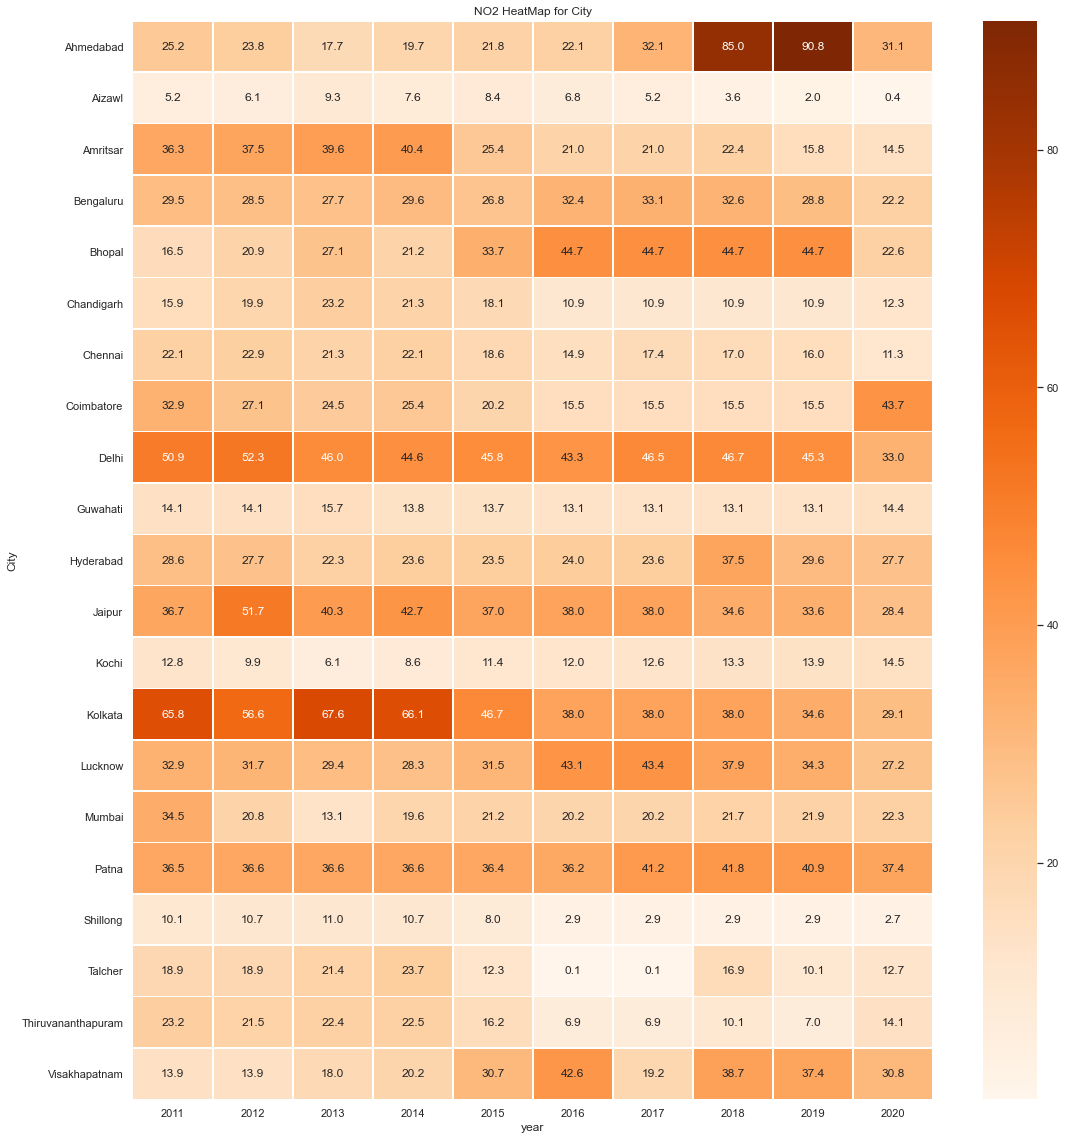

In [7]:
Heatmap('NO2','City')

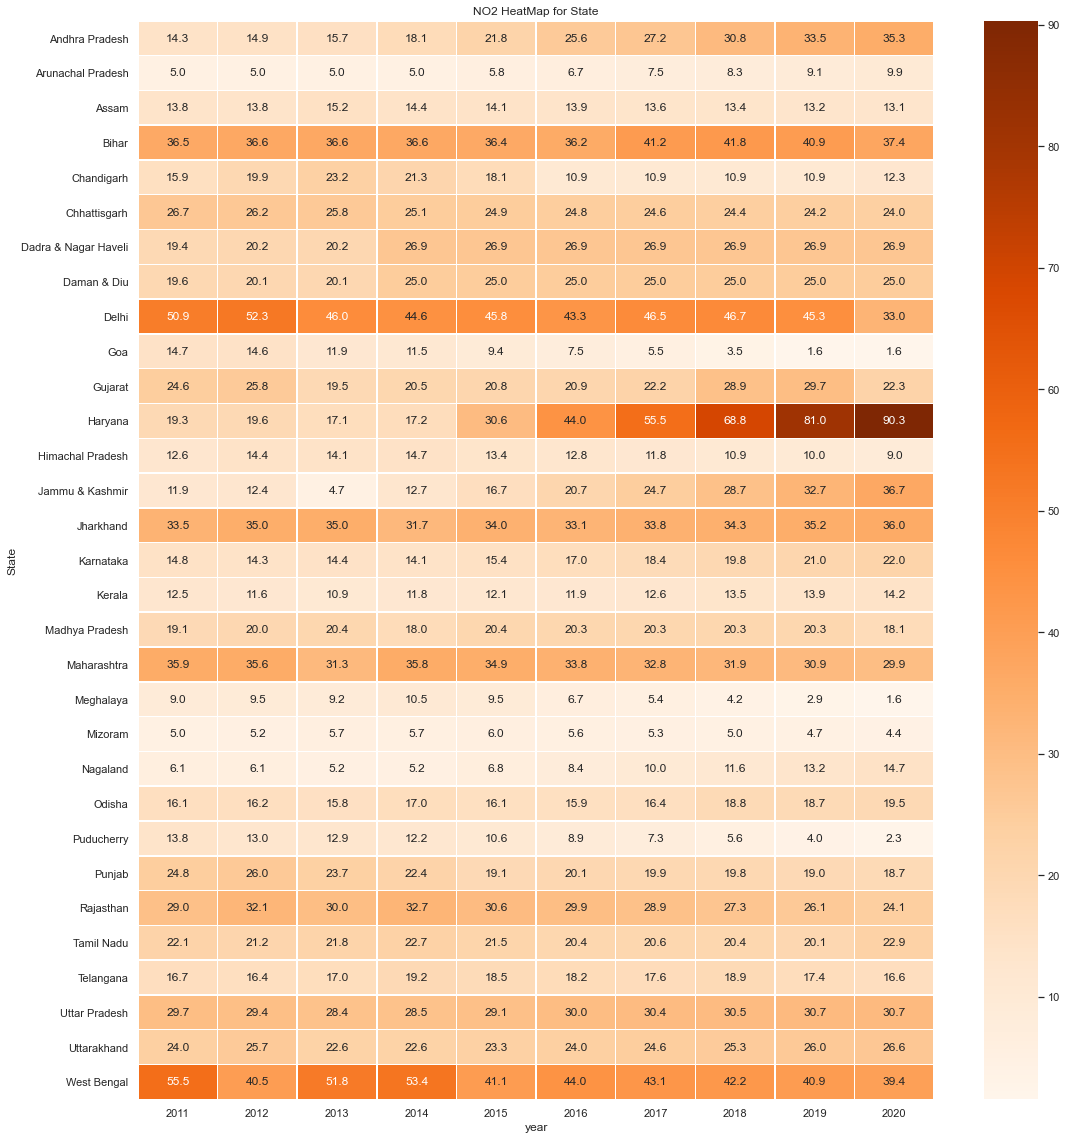

In [8]:
Heatmap('NO2','State')

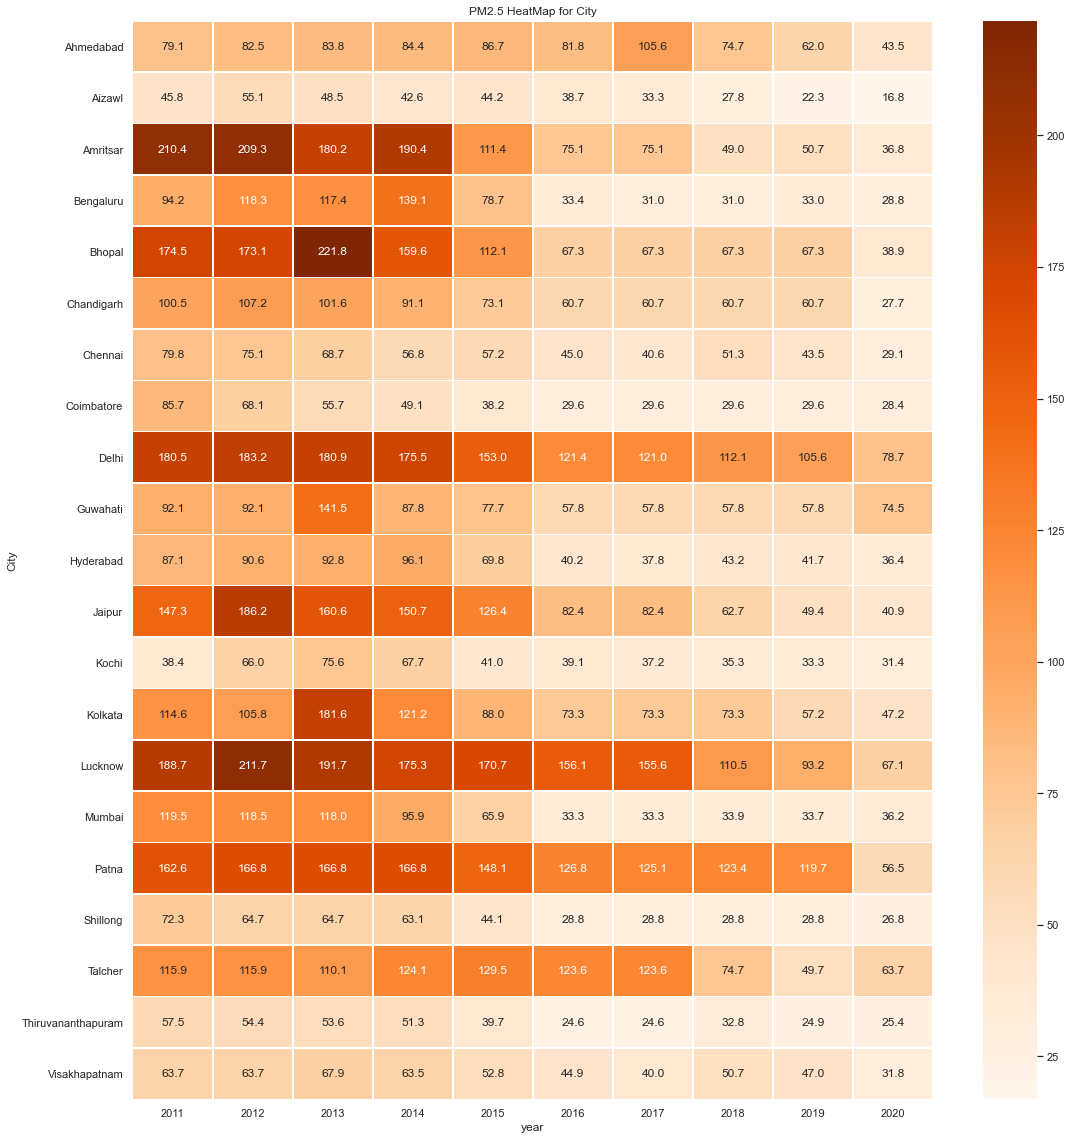

In [9]:
Heatmap('PM2.5','City')

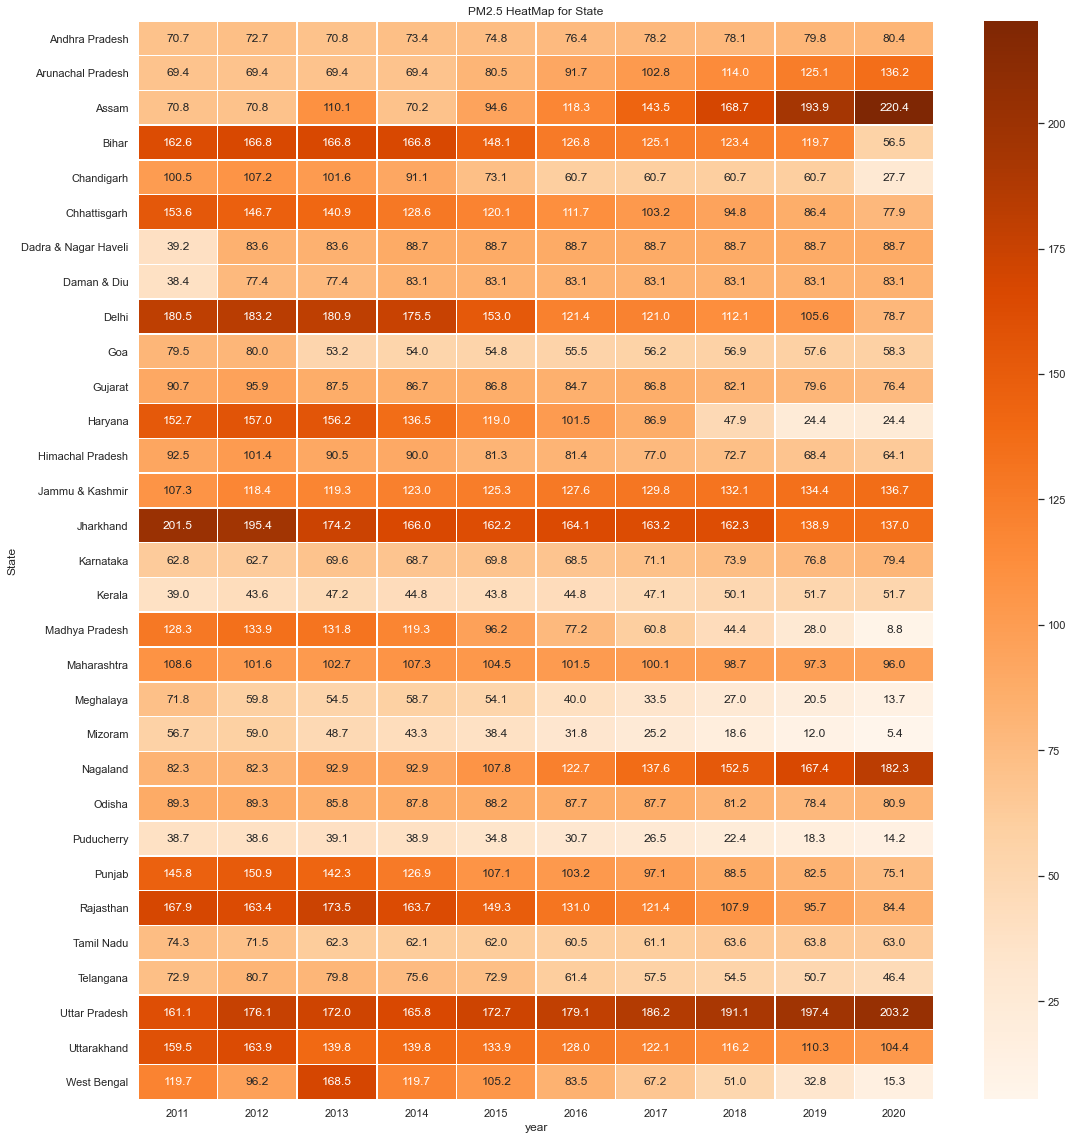

In [10]:
Heatmap('PM2.5','State')

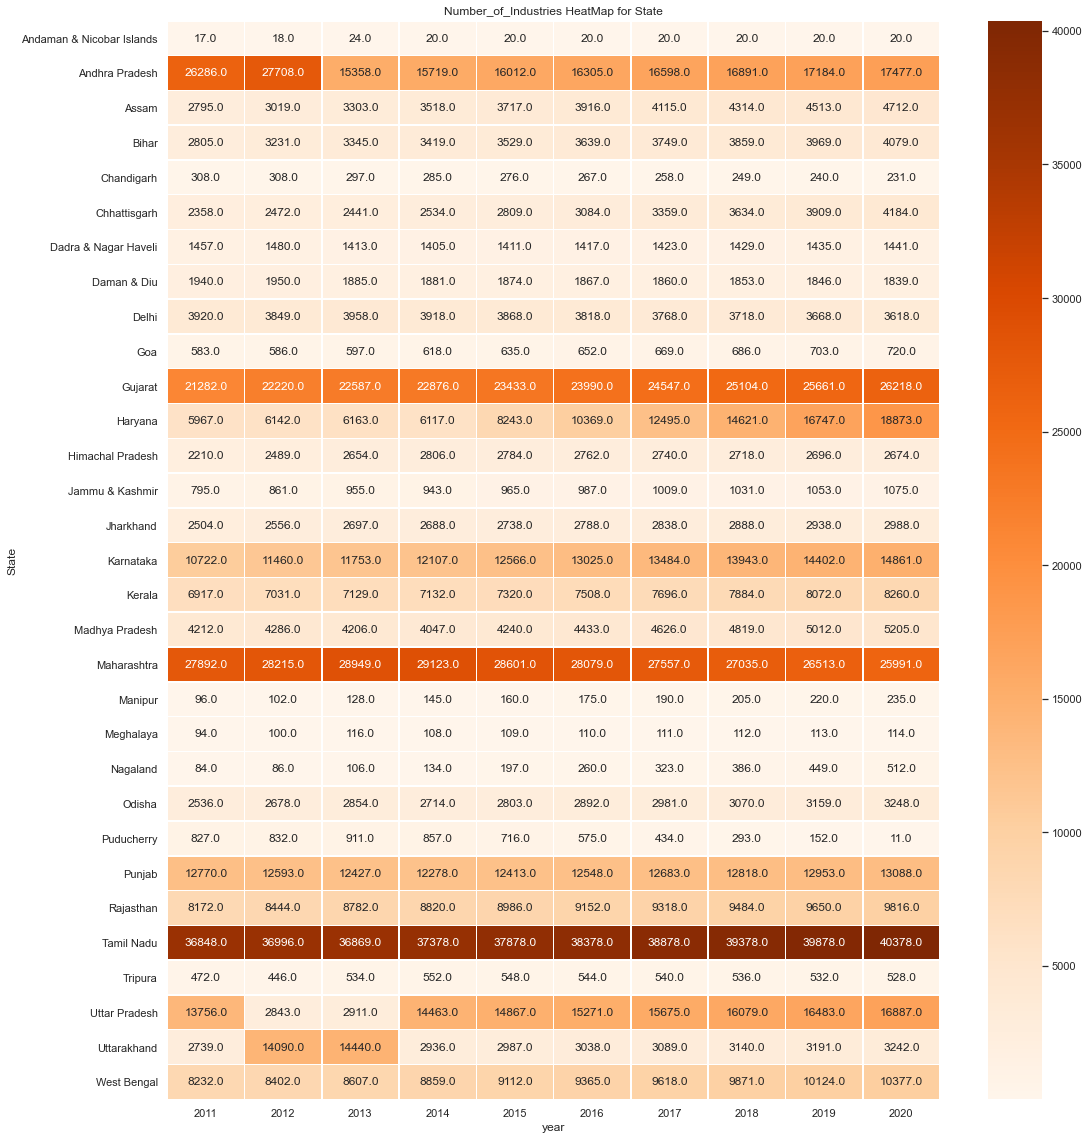

In [11]:
Heatmap('Number_of_Industries','State')

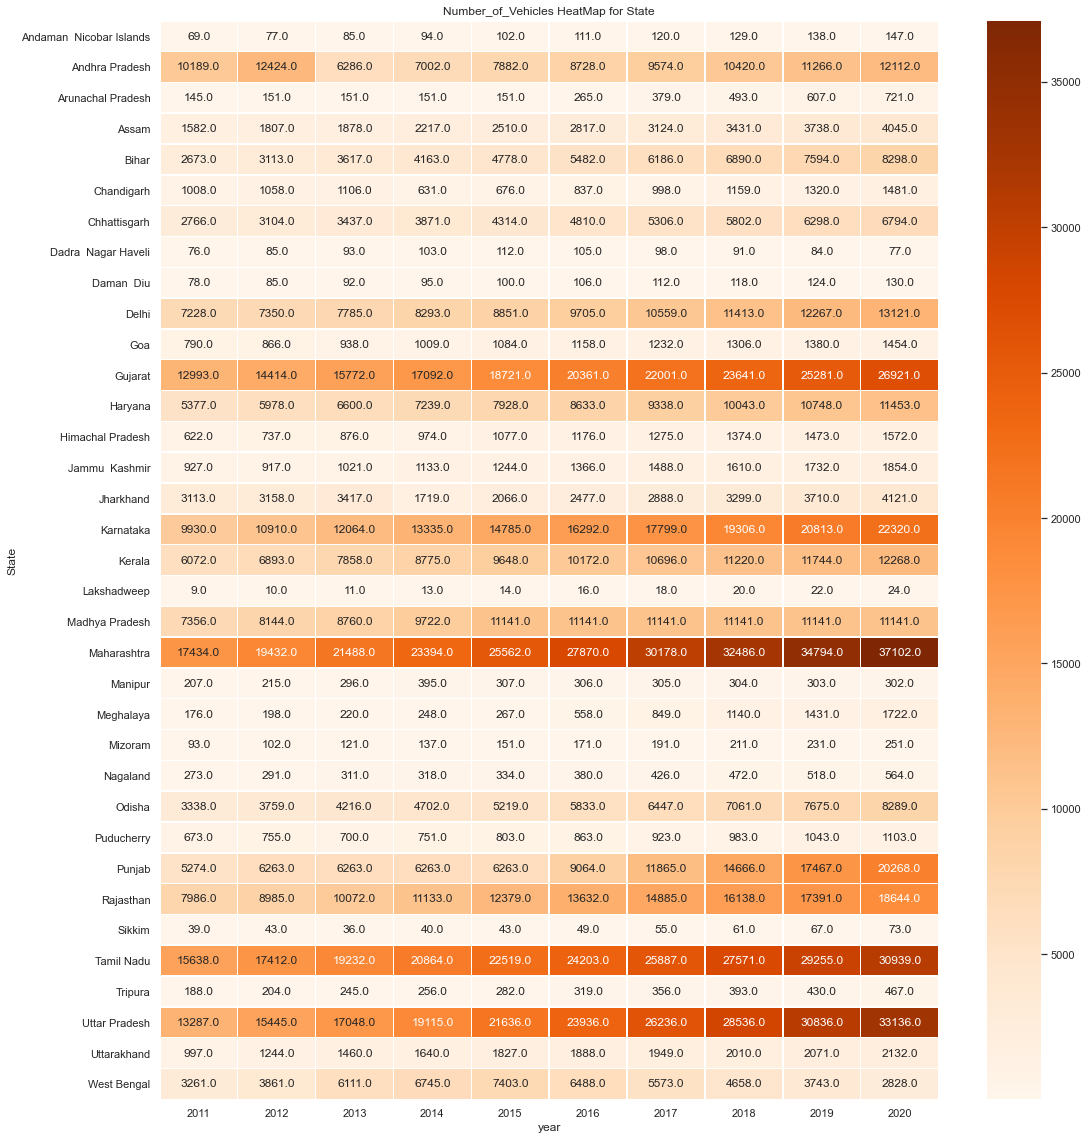

In [12]:
Heatmap('Number_of_Vehicles','State')

## BAR PLOTS

**CALCULATING MEAN FOR ALL STATES**

In [13]:
#YEAR DATA OF STATES
df_st_2019 = dec_State[dec_State['year']==2019].reset_index(drop=True)

#dropping 2019,2020 from ORIGINAL DATAFRAME
df_st_2011_2018 = dec_State[dec_State['year'] < 2019].reset_index(drop=True)

In [14]:
#MEAN FOR ALL STATES
mean_df_st = df_st_2011_2018.groupby('State').aggregate({'SO2':np.mean,'NO2':np.mean,'PM2.5':np.mean}).reset_index()
mean_df_st.columns = [['State_m', 'SO2_m', 'NO2_m', 'PM2.5_m']]

ind_m_so2 = df_st_2011_2018.SO2.mean()         #MEANS OF POLLUTANT
ind_m_no2 = df_st_2011_2018.NO2.mean()
ind_m_pm25 = df_st_2011_2018['PM2.5'].mean()

#merging with mean as BOTH Have same "STATE name alignement" we can add directly columns
df_st_2019[['SO2_m','NO2_m','PM2.5_m']] = mean_df_st[['SO2_m','NO2_m','PM2.5_m']]

#DIFFERNCE BETWEEN MEAN AND 2019 to show HOW MUCH POLLUTANTS HAVE INCREASED IN THE DECADE
# positive difference indicates POLLUTANT IN 2019 is higher and vice versa
df_st_2019['deviation_so2'] = df_st_2019['SO2'] - df_st_2019['SO2_m']         
df_st_2019['deviation_no2'] = df_st_2019['NO2'] - df_st_2019['NO2_m']
df_st_2019['deviation_pm2.5'] = df_st_2019['PM2.5'] - df_st_2019['PM2.5_m']

#SORTING ON "DEVIATIONS OF CONCENTRATIONS FROM REPECTIVE STATE MEAN"
df1 = df_st_2019.sort_values('deviation_so2')
df2 = df_st_2019.sort_values('deviation_no2')
df3 = df_st_2019.sort_values('deviation_pm2.5')

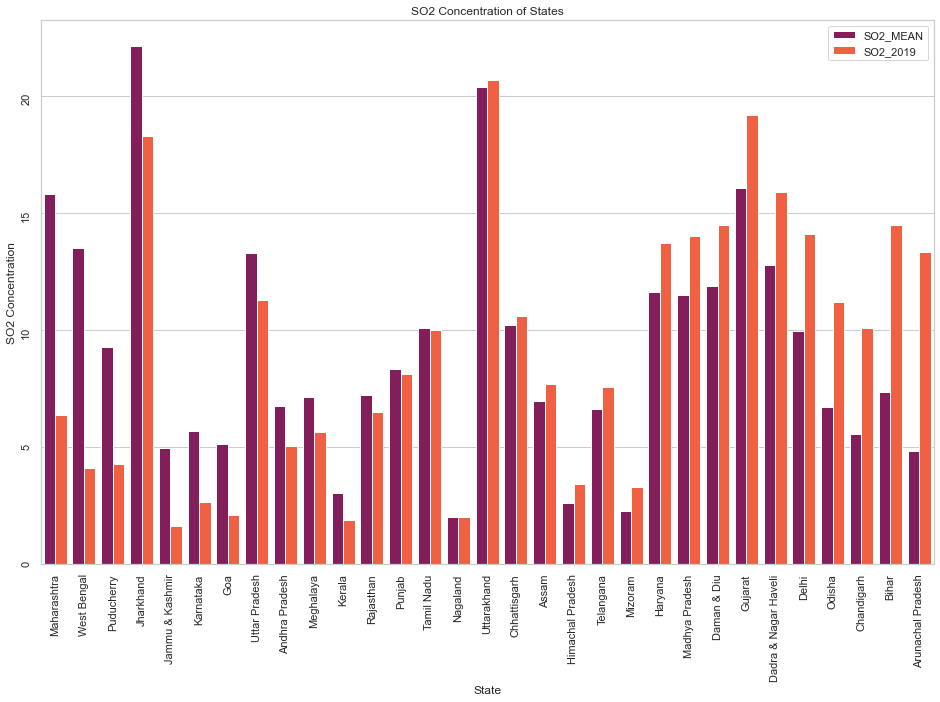

In [15]:
fig = plt.figure(figsize=(16, 10))
df1 =df1[['State','SO2','SO2_m']]
df1 =df1.melt(id_vars='State',value_name="value",var_name='cols')

x1 = sns.barplot(x='State',y='value',ci=None,data=df1,hue='cols',palette="rocket", saturation=1.0,hue_order=['SO2_m','SO2'])
# x1 = sns.barplot(x='State',y='value',ci=None,data=df1,hue='cols')
x1.tick_params(labelrotation=90)
plt.xlabel("State")
plt.ylabel('SO2 Concentration')
plt.title('SO2 Concentration of States')
plt.legend(['SO2_MEAN','SO2_2019'])
plt.show()
fig.savefig('../Images/SO2-barplot.png')

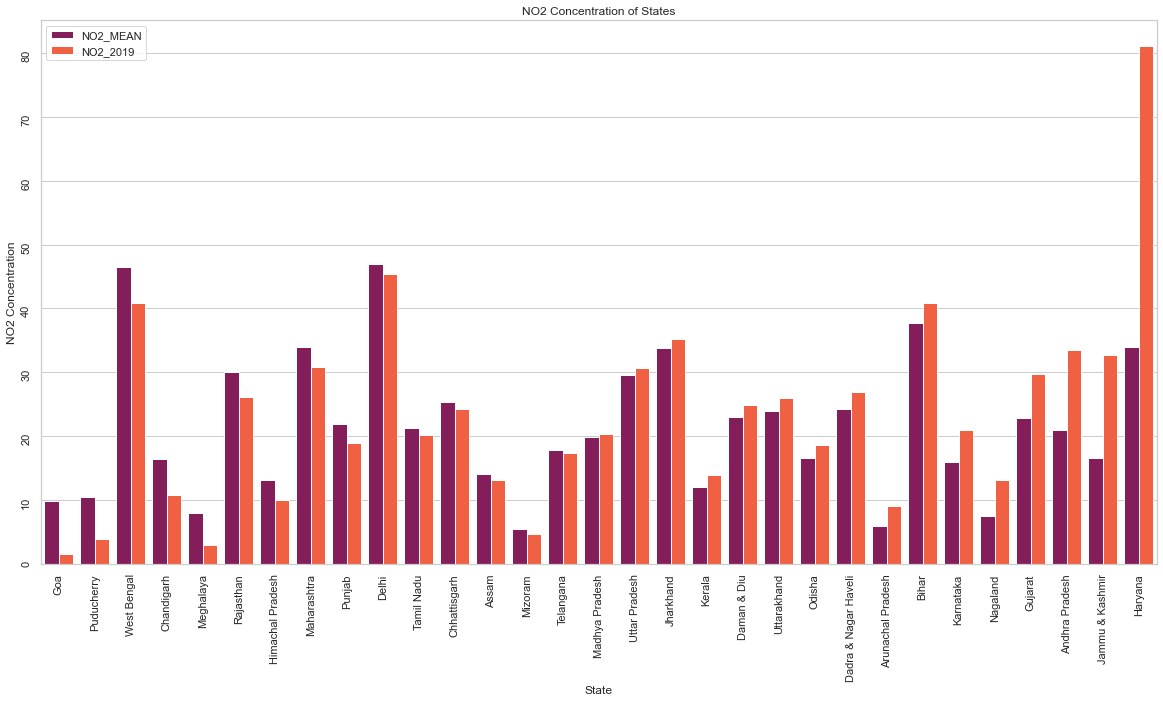

In [16]:
fig = plt.figure(figsize=(20, 10))
df2 =df2[['State','NO2','NO2_m']]
df2 =df2.melt(id_vars='State',value_name="value",var_name='cols')

x2 = sns.barplot(x='State',y='value',ci=None,data=df2,hue='cols',palette="rocket", saturation=1.0,hue_order=['NO2_m','NO2'])
x2.tick_params(labelrotation=90)
plt.xlabel("State")
plt.ylabel('NO2 Concentration')
plt.title('NO2 Concentration of States')
plt.legend(['NO2_MEAN','NO2_2019'])
plt.show()
fig.savefig('../Images/NO2-barplot.png')

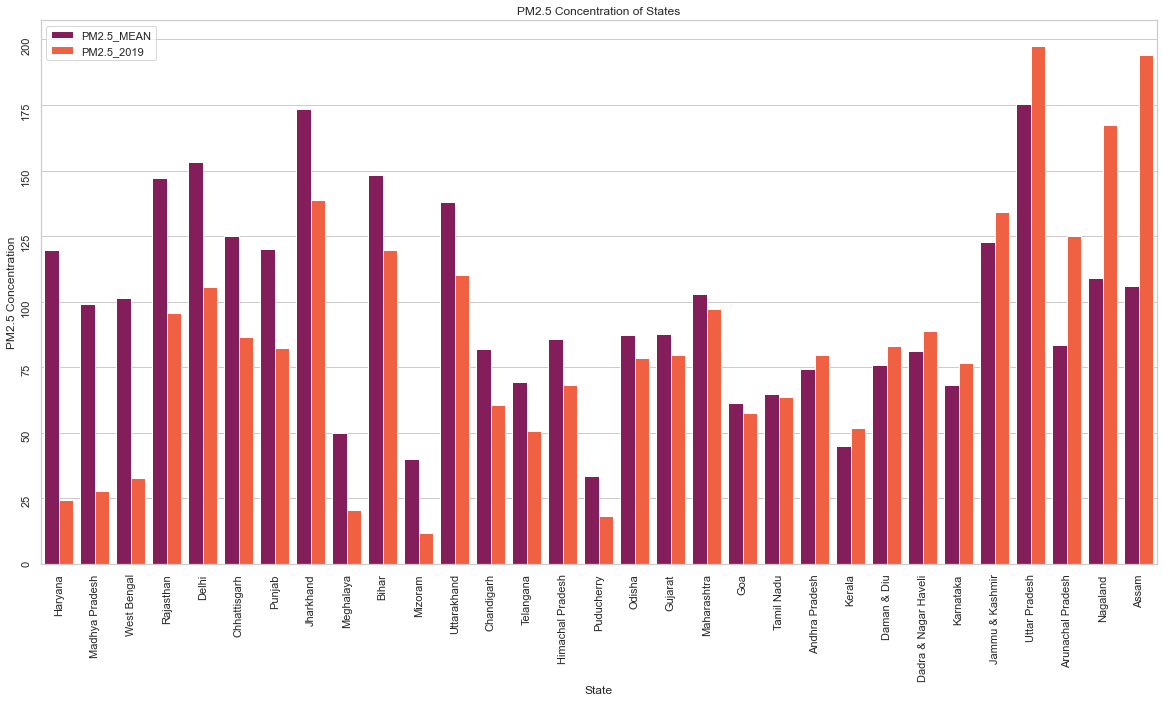

In [17]:
fig = plt.figure(figsize=(20, 10))
df3 =df3[['State','PM2.5','PM2.5_m']]
df3 =df3.melt(id_vars='State',value_name="value",var_name='cols')

# x3 = sns.barplot(df3['State'],df3['PM2.5'],color='blue',ci=None)
x3 = sns.barplot(x='State',y='value',ci=None,data=df3,hue='cols',palette="rocket", saturation=1.0,hue_order=['PM2.5_m','PM2.5'])
x3.tick_params(labelrotation=90)

plt.xlabel("State")
plt.ylabel('PM2.5 Concentration')
plt.title('PM2.5 Concentration of States')
plt.legend(['PM2.5_MEAN','PM2.5_2019'])
plt.show()
fig.savefig('../Images/PM-barplot.png')